### Importing Libraries

In [698]:
import numpy as np                                          #Importing package numpys (For Numerical Python)
import pandas as pd                                         #Importing for panel data analysis
pd.set_option('display.max_columns', None)                  # Unfolding hidden features if the cardinality is high
#---------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                             #Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                       # Backend used for rendering and GUI integration
import seaborn as sns                                       #Importin seaborm library for interactive visualization
%matplotlib inline
#---------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split        # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression         # To create the Logistic Regression Model
#---------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix                #For verifying model performance using confusion matrix
from sklearn.metrics import accuracy_score                  #For calculating the accuracy for the model
from sklearn.metrics import f1_score                        # For Checking the F1-Score of our model
#---------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Data Acquisition & Description

- This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

- The column is_canceled is also present in the dataset which has two values 1 and 0 represent booking canceled or Not respectively.

- This is the data that we have to predict for future samples.


- The dataset is divided into two parts: Train, and Test sets.

- Train Set:
    - The train set contains 83573 rows and 32 columns.
    - The last column is_canceled is the target variable.



In [699]:
#Read and load data
hotel_data = pd.read_csv('train_data.csv')
#Display data
hotel_data.head()

,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,9710,Resort Hotel,1,122,2016,December,53,27,0,4,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,3,No Deposit,240.0,0,Transient,74.75,0,2,Canceled,2016-11-27
1,40307,City Hotel,1,20,2015,July,30,22,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0,Transient-Party,62.00,0,0,Canceled,2015-07-17
2,110051,City Hotel,0,87,2017,April,16,16,2,3,3,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,171.00,0,0,Check-Out,2017-04-21
3,22999,Resort Hotel,0,0,2017,February,5,2,0,1,1,0.0,0,BB,PRT,Online TA,TA/TO,1,0,1,A,A,0,No Deposit,196.0,0,Transient,43.00,0,1,Check-Out,2017-02-03
4,8344,Resort Hotel,1,42,2016,September,39,23,0,1,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,109.00,0,1,Canceled,2016-08-26


#### Basic understanding of the Data

In [700]:
# Number of Rows and Columns
hotel_data.shape

(83573, 32)

In [701]:
#checking if data is balanced or not?
hotel_data['is_canceled'].value_counts()

0    52688
1    30885
Name: is_canceled, dtype: int64

 - 1 = cancelled, 0 = not cancelled
 - The proportion between classes looks balanced

In [702]:
# basic info. of the data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           83573 non-null  int64  
 1   hotel                           83573 non-null  object 
 2   is_canceled                     83573 non-null  int64  
 3   lead_time                       83573 non-null  int64  
 4   arrival_date_year               83573 non-null  int64  
 5   arrival_date_month              83573 non-null  object 
 6   arrival_date_week_number        83573 non-null  int64  
 7   arrival_date_day_of_month       83573 non-null  int64  
 8   stays_in_weekend_nights         83573 non-null  int64  
 9   stays_in_week_nights            83573 non-null  int64  
 10  adults                          83573 non-null  int64  
 11  children                        83569 non-null  float64
 12  babies                          

In [703]:
#looking for missing data, data type, zero frequency and unique values in each column.

hotel_missing = []
for name in hotel_data.columns:
  hotel_missing.append(
      [
       name,
       hotel_data[name].dtypes,
       hotel_data[name].isnull().sum(),
       round(hotel_data[name].isnull().sum()/len(hotel_data)*100,2),
       hotel_data[name][hotel_data[name] == 0].count(),
       hotel_data[name][hotel_data[name] == 0].count()/hotel_data[name].shape[0]*100,
#      hotel_data[name].duplicated().sum(),
       hotel_data[name].nunique()
       ]
       )

hotel_missing = pd.DataFrame(hotel_missing, columns = ['Column','Dtype','Null','Null(%)','zero_frequency','zero_frequency(%)','nunique'])

In [704]:
hotel_missing

,Column,Dtype,Null,Null(%),zero_frequency,zero_frequency(%),nunique
0,Index,int64,0,0.00,0,0.000000,83573
1,hotel,object,0,0.00,0,0.000000,2
2,is_canceled,int64,0,0.00,52688,63.044285,2
3,lead_time,int64,0,0.00,4457,5.333062,475
4,arrival_date_year,int64,0,0.00,0,0.000000,3
5,arrival_date_month,object,0,0.00,0,0.000000,12
6,arrival_date_week_number,int64,0,0.00,0,0.000000,53
7,arrival_date_day_of_month,int64,0,0.00,0,0.000000,31
8,stays_in_weekend_nights,int64,0,0.00,36426,43.585847,16
9,stays_in_week_nights,int64,0,0.00,5394,6.454238,32


In [705]:
# extracting out the list of columns having missing data
print('list of columns of missing data:', list(hotel_data.columns[hotel_data.isnull().any()]))

list of columns of missing data: ['children', 'agent']


- there is missing data in column 'children' = 4 (0.004786%) and 'agent' = 11417 (13.661111%),
  - will take care of this missing data later after profiling the data
- "reservation_status_date", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", should be of datetime datatype
- "agent", "index", "arrival_date_week_number" will drop these columns as i don't see any information realted to problem statement coming out of these columns.
- About 63% of the bookings were not cancelled.

In [706]:
#checking for duplicates

hotel_data.duplicated().sum()

0

- no duplicates found.

In [707]:
#describe - statistical measures of the data
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,83573.0,59781.249710,34509.357576,1.00,29832.00,59849.0,89699.0,119388.0
is_canceled,83573.0,0.369557,0.482688,0.00,0.00,0.0,1.0,1.0
lead_time,83573.0,103.913369,106.868443,0.00,18.00,69.0,160.0,737.0
arrival_date_year,83573.0,2016.156187,0.707718,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,83573.0,27.148301,13.604490,1.00,16.00,27.0,38.0,53.0
arrival_date_day_of_month,83573.0,15.783339,8.791722,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,83573.0,0.927560,1.001097,0.00,0.00,1.0,2.0,18.0
stays_in_week_nights,83573.0,2.501310,1.914762,0.00,1.00,2.0,3.0,42.0
adults,83573.0,1.856018,0.582376,0.00,2.00,2.0,2.0,50.0
children,83569.0,0.103663,0.397360,0.00,0.00,0.0,0.0,3.0


- The mean value for the is_canceled column is 0.37, indicating that around 37% of the bookings were canceled.
- The average lead_time is 104 days, with a standard deviation of 107 days, suggesting that many bookings are made  well in advance.
- Most of the bookings were made in the year 2016 (median value).
- The average "stays_in_weekend_nights" is less than one, indicating that most of the bookings were made for weekdays.
- The average number of adults is 1.86, and the most frequent value is 2.
 - but also there is min = 0 in adults which needs attention to dig more. 
- Most of the bookings did not involve "children" or "babies".
 - 'babies' features has issue Max is 10 while other quartiles are 0 might be outliers or wrong value.
- Only 3% of the bookings were made by "is_repeated_guest".
- The average "booking_changes" is less than one, suggesting that most of the bookings were not modified after they were  made.
- The "adr" column has a large range, with a maximum value of 5400, unusual high prices which may indicate that  some bookings may have been for high-end suites or other luxurious accommodations.
- The minimum ADR is negative, indicating that some bookings may have been discounted or had other credits applied. will remove this or it will affect overall data analysis.
- The majority of the bookings did not require any "required_car_parking_spaces".
- The average number of "total_of_special_requests" is less than one, suggesting that most of the bookings did not  involve any special requests.

In [708]:
#describe - statistical measures of the data
hotel_data.describe(include = 'O').T

,count,unique,top,freq
hotel,83573,2,City Hotel,55605
arrival_date_month,83573,12,August,9673
meal,83573,5,BB,64582
country,83573,170,PRT,34022
market_segment,83573,8,Online TA,39655
distribution_channel,83573,5,TA/TO,68592
reserved_room_type,83573,10,A,60173
assigned_room_type,83573,11,A,51837
deposit_type,83573,3,No Deposit,73270
customer_type,83573,4,Transient,62713


- There are two hotels in the dataset, with City Hotel being the most frequent.
- August is the most common arrival month.
- Most guests have booked a Bed & Breakfast (BB) meal plan.
- The most common country of origin for guests is PRT (Portugal).
- The most common market segment is Online TA, which refers to online travel agencies.
- The most common distribution channel is TA/TO, which refers to travel agents and tour operators.
- Most guests have reserved room type A.
- Most guests have been assigned room type A.
- Most guests did not have to pay a deposit,no deposit here might have a reason why cancellation is high (since customer will not have anything to loose in this no deposit case)
- Most guests are of the Transient customer type, which likely refers to one-time customers.

**we have explored data enough for basic cleaning and will start with**
1. dropping columns which are not required or of no use from the analysis perspective.
2. change the datatype of the columns mentioned above.
3. missing data treatment but with exploring each column one by one.
4. any other treatment required in data inconsistency while exploring.

In [709]:
# dropping columns not required.
hotel_data.drop(['Index','arrival_date_week_number','agent'], axis=1, inplace=True)  

- Changing datatype - "reservation_status_date", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", to datetime.


- The original dataset has custumer's arrival date with day, month, and year each in a separate column. For analysis purpose, will combine all of those elements into one "arrival_date".

In [710]:
# Creating the arrival date full feature: 
hotel_data['arrival_date'] = hotel_data['arrival_date_year'].astype(str) + "-" + hotel_data['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + hotel_data['arrival_date_day_of_month'].astype(str)
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date'], format="%Y-%m-%d")

In [711]:
# now dropping columns 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' that are not required.
hotel_data.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'], axis=1, inplace=True) 

In [712]:
# changing datatype for "reservation_status_date"
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'], format="%Y-%m-%d")

#### missing data treatment
As we have seen there is missing data in column 'children' = 4

In [713]:
hotel_data['children'].value_counts()

0.0    77570
1.0     3386
2.0     2562
3.0       51
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='Density'>

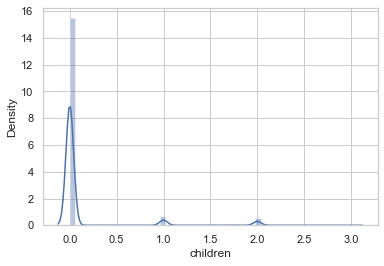

In [714]:
sns.distplot(hotel_data['children'])

- so with value_counts and distplot we can see that "children" is skewed so will replace missing data with median.

In [715]:
hotel_data['children'] = hotel_data['children'].fillna(hotel_data['children'].median())

In [716]:
hotel_data['children'].isnull().sum()

0

- no more missing data in 'children'

In [717]:
hotel_data['babies'].value_counts()

0     82912
1       651
2         9
10        1
Name: babies, dtype: int64

- 'babies' features has issue Max is 10 while other quartiles are 0 might be outliers or wrong value, will replace it with 1

In [718]:
hotel_data['babies'] = hotel_data['babies'].replace(10, 1)

In [719]:
hotel_data['babies'].value_counts()

0    82912
1      652
2        9
Name: babies, dtype: int64

In [720]:
hotel_data.shape

(83573, 27)

In [721]:
#As we have seen Most of the bookings did not involve "children" or "babies"
#So, babies, adults, and children can not be zero at the same time, so we will drop all the observations having zero at the same time.

filtered_data = (hotel_data.children == 0) & (hotel_data.adults == 0) & (hotel_data.babies == 0)
hotel_data[filtered_data].head(2)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
219,City Hotel,0,19,4,7,0,0.0,0,SC,USA,Online TA,TA/TO,0,0,1,A,K,4,No Deposit,0,Group,6.4,0,0,Check-Out,2016-12-07,2016-11-26
3821,City Hotel,0,7,0,0,0,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,0.0,0,1,Check-Out,2017-02-13,2017-02-13


In [722]:
#filtering out data without where babies, adults, and children can not be zero at the same time
hotel_data = hotel_data[~filtered_data]
hotel_data.head(2)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,1,122,0,4,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,3,No Deposit,0,Transient,74.75,0,2,Canceled,2016-11-27,2016-12-27
1,City Hotel,1,20,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,62.00,0,0,Canceled,2015-07-17,2015-07-22


In [723]:
hotel_data.shape

(83441, 27)

- so there were 132 rows which had adult, babies and children are at the same time.

- The "adr" column has a large range, with a maximum value of 5400, unusual high prices which may indicate that some bookings may have been for high-end suites or other luxurious accommodations.
- The minimum 'adr' is negative, indicating that some bookings may have been discounted or had other credits applied and its not possible for hotel to owe money to the guest, so will remove this or it will affect overall data analysis.

<AxesSubplot:xlabel='adr'>

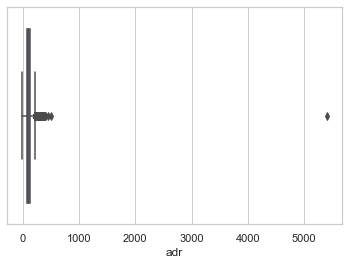

In [724]:
sns.boxplot(hotel_data['adr'])

- cleary visible outlier so will filter out data excluding the negative and this outlier data point.

In [725]:
#This will create a new dataframe, which only contains the rows where adr is less than 0 or more than 5000
filterd_data = (hotel_data.adr < 0) | (hotel_data.adr > 5000)
hotel_data[filterd_data].head(2)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
2401,Resort Hotel,0,195,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05
79274,City Hotel,1,35,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,0,Transient,5400.00,0,0,Canceled,2016-02-19,2016-03-25


In [726]:
hotel_data = hotel_data[~filterd_data]
hotel_data.head(2)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,1,122,0,4,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,3,No Deposit,0,Transient,74.75,0,2,Canceled,2016-11-27,2016-12-27
1,City Hotel,1,20,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,62.00,0,0,Canceled,2015-07-17,2015-07-22


In [727]:
hotel_data.shape

(83439, 27)

In [728]:
hotel_data['adr'].describe()

count    83439.00000
mean       101.84921
std         48.04027
min          0.00000
25%         69.56500
50%         94.50000
75%        126.00000
max        510.00000
Name: adr, dtype: float64

- now there is no negative and extreme high value in 'adr'.

In [729]:
hotel_data['meal'].value_counts()

BB           64529
HB           10084
SC            7434
Undefined      836
FB             556
Name: meal, dtype: int64

- So, here undefined and SC are no meal package selected. will keep it in one by replacing it with NM-no meal

In [730]:
hotel_data['meal'] = hotel_data['meal'].replace(['SC','Undefined'], 'NM')

In [731]:
hotel_data['meal'].value_counts()

BB    64529
HB    10084
NM     8270
FB      556
Name: meal, dtype: int64

In [732]:
hotel_data['country'].value_counts()

PRT    33940
GBR     8423
FRA     7277
ESP     5992
DEU     5122
       ...  
GUY        1
AIA        1
SLE        1
BHS        1
CYM        1
Name: country, Length: 170, dtype: int64

- as we can see that the number of country values is very large in this dataset, we will summarize the values to Local or International for easy understanding of analysis by creating new feature called "guest_location"

- To determine the value based on the following criteria, because this hotel dataset is located in Portugal, customers from Portugal will be set to Local and rest to International.

In [733]:
# the goals of creating a new column here is, so later on we can see how booking location affecting cancellation
hotel_data['guest_location'] = hotel_data['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
hotel_data['guest_location'].value_counts()

International    49499
Local            33940
Name: guest_location, dtype: int64

In [734]:
hotel_data['market_segment'].value_counts()

Online TA        39601
Offline TA/TO    16948
Groups           13771
Direct            8754
Corporate         3679
Complementary      520
Aviation           164
Undefined            2
Name: market_segment, dtype: int64

- there is 2 entries as undefined so it can be direct bookings, will replace it with direct

In [735]:
hotel_data['market_segment'] = hotel_data['market_segment'].replace('Undefined', 'Direct')

In [736]:
hotel_data['market_segment'].value_counts()

Online TA        39601
Offline TA/TO    16948
Groups           13771
Direct            8756
Corporate         3679
Complementary      520
Aviation           164
Name: market_segment, dtype: int64

In [737]:
hotel_data['distribution_channel'].value_counts()

TA/TO        68496
Direct       10189
Corporate     4616
GDS            134
Undefined        4
Name: distribution_channel, dtype: int64

- there are only 4 entries as undefined so it can be direct bookings as we have seen in market segment column, so will replace it with direct

In [738]:
hotel_data['distribution_channel']  = hotel_data['distribution_channel'].replace('Undefined', 'Direct')

In [739]:
hotel_data['distribution_channel'].value_counts()

TA/TO        68496
Direct       10193
Corporate     4616
GDS            134
Name: distribution_channel, dtype: int64

In [740]:
hotel_data['previous_cancellations'].value_counts(normalize=True)

0     0.945745
1     0.050720
2     0.000911
3     0.000443
24    0.000443
11    0.000288
4     0.000288
6     0.000216
26    0.000216
25    0.000204
19    0.000180
5     0.000144
14    0.000108
13    0.000084
21    0.000012
Name: previous_cancellations, dtype: float64

- we can see that almost 95% booking were never cancelled before, so will group the data into two, 'never cancelled' and 'have been cancelled before'

In [741]:
hotel_data['previous_cancellations'] = hotel_data['previous_cancellations'].apply(lambda x: 'never cancelled' if x == 0 else 'cancelled before')

In [742]:
hotel_data['previous_cancellations'].value_counts()

never cancelled     78912
cancelled before     4527
Name: previous_cancellations, dtype: int64

In [743]:
hotel_data['booking_changes'].value_counts(normalize=True)\
    .reset_index()\
    .rename(columns={'index': 'booking_changes', 'booking_changes': 'percentage'})

,booking_changes,percentage
0,0,0.849651
1,1,0.105574
2,2,0.032011
3,3,0.007574
4,4,0.002996
5,5,0.000947
6,6,0.000611
7,7,0.000288
8,8,0.000072
9,9,0.000072


- almost 85 % of the customers never made changes in their booking
- since there are many values in this 'booking changes' column, we will group it in to two if ever made changes in the booking or not.

In [744]:
hotel_data['booking_changes'] = hotel_data['booking_changes'].apply(lambda x: 'no' if x == 0 else 'yes')

In [745]:
hotel_data['booking_changes'].value_counts()

no     70894
yes    12545
Name: booking_changes, dtype: int64

### Redefine numerical and categorical features separately

In [746]:
#Numeric
numerical = hotel_data.loc[:, (hotel_data.dtypes == 'int64') | (hotel_data.dtypes == 'float64')].columns.tolist()
numerical

['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_bookings_not_canceled',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [747]:
#Categorical
categorical = hotel_data.loc[:, (hotel_data.dtypes != 'int64') & (hotel_data.dtypes != 'float64')].columns.tolist()
categorical

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'previous_cancellations',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'arrival_date',
 'guest_location']

## Collinearity Check

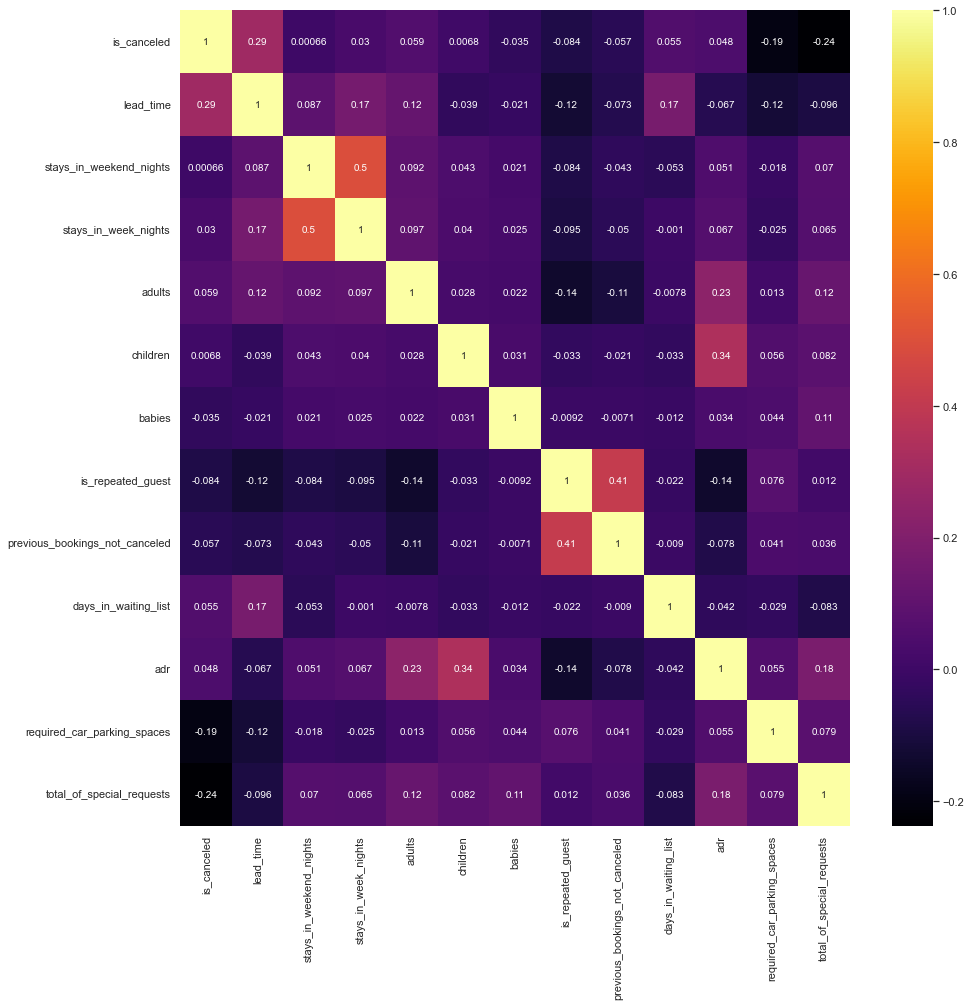

In [748]:
figure =plt.figure(figsize = (15,15))
sns.heatmap(hotel_data[numerical].corr(), annot=True, cmap='inferno')
plt.show()

In [749]:
# Compute correlation matrix
corr_matrix = hotel_data[numerical].corr()

# Sort correlation values in descending order
corr_values = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Print top 15 correlations
print(corr_values[:15])


is_canceled                     is_canceled                1.000000
stays_in_weekend_nights         stays_in_week_nights       0.495297
previous_bookings_not_canceled  is_repeated_guest          0.413356
adr                             children                   0.340834
is_canceled                     lead_time                  0.292986
adults                          adr                        0.232158
total_of_special_requests       adr                        0.179383
days_in_waiting_list            lead_time                  0.170146
lead_time                       stays_in_week_nights       0.166904
total_of_special_requests       adults                     0.121230
lead_time                       adults                     0.118890
total_of_special_requests       babies                     0.110643
stays_in_week_nights            adults                     0.097344
adults                          stays_in_weekend_nights    0.091802
stays_in_weekend_nights         lead_time       

The above output shows the top 15 highest correlation values between numerical features in the hotel dataset. Here are some insights that can be drawn:
- The strongest correlation is between "is_canceled" and "is_canceled", which is expected as it is the correlation of the feature with itself.

- The 2nd highest correlation is between "stays_in_weekend_nights" and "stays_in_week_nights" (0.495). This suggests that guests tend to stay for similar durations on weekends and weekdays.

- The 3rd highest correlation is between "is_repeated_guest" and "previous_bookings_not_canceled" (0.413). This suggests that guests who have previously booked and not canceled are more likely to be repeated guests.

- The 4th highest correlation is between "adr" and "children" (0.340). This suggests that the average daily rate tends to be higher for bookings with children.

- The 5th highest correlation is between "lead_time" and "is_canceled" (0.292). This confirms the earlier observation that longer lead times tend to lead to lower cancellation rates.

- The 6th highest correlation is between "adr" and "adults" (0.232). This suggests that bookings with more adults tend to have a higher average daily rate.

- The 7th highest correlation is between "adr" and "total_of_special_requests" (0.179). This suggests that bookings with more special requests tend to have a higher average daily rate.
- The remaining correlations suggest weaker associations between the features.

In [750]:
from itertools import combinations
from scipy.stats import chi2_contingency

def pairwise_chi_squared(hotel_data):

    # Initialize results DataFrame
    results_hotel_data = pd.DataFrame(columns=['Column 1', 'Column 2', 'Chi2', 'P-value'])

    # Loop over pairs of categorical columns and compute chi-squared test
    for col1, col2 in combinations(categorical, 2):
        contingency_table = pd.crosstab(hotel_data[col1], hotel_data[col2])
        chi2, pval, dof, expected = chi2_contingency(contingency_table)
        results_hotel_data = results_hotel_data.append({'Column 1': col1, 'Column 2': col2, 'Chi2': chi2, 'P-value': pval},ignore_index=True)

    return results_hotel_data

# Call the pairwise_chi_squared function
results = pairwise_chi_squared(hotel_data)

# Print the results
print(results)

                    Column 1                Column 2           Chi2 P-value
0                      hotel                    meal    4990.412611     0.0
1                      hotel                 country    8404.565829     0.0
2                      hotel          market_segment    1751.022539     0.0
3                      hotel    distribution_channel    2917.931891     0.0
4                      hotel  previous_cancellations     607.475634     0.0
..                       ...                     ...            ...     ...
100       reservation_status            arrival_date    9726.849523     0.0
101       reservation_status          guest_location    9372.035964     0.0
102  reservation_status_date            arrival_date  8283584.78465     0.0
103  reservation_status_date          guest_location   18734.895532     0.0
104             arrival_date          guest_location   10211.190818     0.0

[105 rows x 4 columns]


- In the output, each row represents a pair of variables that were tested, and the columns provide information about the Chi-squared statistic and the corresponding p-value. The Chi-squared statistic measures the strength of the association between the two variables, and the p-value tells us whether the association is statistically significant (i.e., whether it is likely to have occurred by chance).
- Looking at the output, we can see that all pairs of variables have very low p-values (all are 0.0), indicating that there is a significant association between them. This suggests that these variables are not independent and are related to each other in some way.


In [756]:
hotel_data.to_csv('hotel_cleaned_data.csv' ,index= False)

- now data seems to be cleaned there is no missing values and randomness, we will export the data and will do exploratory data analysis with visualizations.